# What is Julia?

New-ish programming language (under development since 2010) with a focus on scientific computation and AI/ML.
Free and open-source compiler and standard libraries:
- https://julialang.org/
- https://github.com/JuliaLang
Over 50,000 commits on Github.

![logo.svg](media/logo.svg)

One of a very few languages in the [Petaflop club](https://www.hpcwire.com/off-the-wire/julia-joins-petaflop-club).

Julia ranked the [5th Most Loved Language](https://insights.stackoverflow.com/survey/2021#technology-most-loved-dreaded-and-wanted) on stack overflow survey (more loved than python!).

JuliaComputing (employer of core Julia developers), recently raised [$24M in Series A funding](https://juliacomputing.com/media/2021/07/series-a/).

# Why Julia? Do we really need yet another programming language?

The two language problem is ubiquitous in IT industry.
Coders have to choose between,
- code performance (C/C++/Rust)
- code simplicity (Python)

What happens in practice?
Prototype in python, deploy with C/C++.

Scientific computation is even worse!
It has a three language problem.
Scientific coders have to choose between:
- code performance (C/C++/Rust)
- code simplicity (Python)
- linear algebra (Fortran)

Julia proposes to solve this three-language problem, and provide a simple, fast language with native support for linear algebra and distributed computing.


## Some Examples


### Simplicity

In [ ]:
function keep_it_simple(x)
    println("The value '$x' is a $(typeof(x))")
end

In [ ]:
keep_it_simple(1);
keep_it_simple(1.0);
keep_it_simple("hello world");

### Linear Algebra (solving Ax=b)

In [ ]:
A = [1 2; 3 4]
b = [5, 6]

In [ ]:
x = A \ b

The same code in python looks like as:

```python
import numpy as np
import numpy.linalg as lin
A = np.array([[1,2],[3,4]])
b = np.array([[5],[6]])
x = lin.solve(B,b)
```

### Performance

In [ ]:
fib(n) = n < 2 ? n : fib(n-1) + fib(n-2)

In [ ]:
@time fib(42) == 267914296

Similar code in Python 3:

```python
import time
def fib(n):
    if n<2:
        return n
    return fib(n-1)+fib(n-2)

start = time.time()
fib(42)
end = time.time()
print(end-start)
```

This code takes 84 seconds in Python v3.7 on 2.4 GHz 8-Core Intel Core i9.
Julia v1.6 took 1.2 seconds on the same hardware.

## Is Julia really that fast? 

![benchmarks.svg](media/benchmarks.svg)


### What's the trick?

- JIT to machine-instruction (no interperater)
- Secerte sauce: [LLVM](https://llvm.org)


# Scientific Computation is a Julia Core-usecase

- native linear algebra support
- native green threads support 
- native GPU computing support
- native distributed computing support (see, Distributed)

In [ ]:
for i in 1:5
    println("N = $i")
end
println()

Threads.@threads for i in 1:5
    println("i = $i (thread $(Threads.threadid()) of out $(Threads.nthreads()))")
end


The `Distributed` package provides multi-node distributed computing.

In [ ]:
import Distributed
if length(Distributed.workers()) <= 1
    Distributed.addprocs(6)
end

println(Distributed.workers())

In [ ]:
Distributed.@distributed for i in 1:10
    println("i = $i")
end

# Icing on the "One Language" Cake

- Language-native package manager (with robust version management)
- Language-native virtual environments
- Full Unicode support
- Community focus on inclusion 

These features take a great language to the next level.

In [ ]:
Δ = 1.23
Δ*2

# ML in Julia

TensorFlow and PyTorch are effectively domain-specific languages for ML.
The ML systems are implemented in a wide variety of languages to meet performance and usability requirements.

This begs the question, what type of language could have native support for ML?
Is there a language that can solve the multi-language problem of the ML systems?

Long story short, Google determined only viable choices are [Swift and Julia](https://github.com/tensorflow/swift/blob/main/docs/WhySwiftForTensorFlow.md).

Google tried [Swift](https://tryolabs.com/blog/2020/04/02/swift-googles-bet-on-differentiable-programming/) but eventually [gave up](https://github.com/tensorflow/swift).

![ml-impl-comp.png](media/ml-impl-comp.png)
[ARPA-e talk by Alan Edelman (MIT & JC), Viral Shah (Julia Computing), Juan Pablo Vielma (MIT,Google), Chris Rackauckas](https://arpa-e.energy.gov/sites/default/files/2a%20-%20Edelman%2C%20Alan%20Presentation.pdf)

Julia community for ML is very active:
- Flux.jl is the Julia replacement of TensorFlow and PyTorch resolving the multi-language ML problem.
- Flux.jl is more suitable than TensorFlow and PyTorch for the development and testing of novel ML methods and algorithms.
- The core requirement for ML is computing derivatives.
- Significant efforts Julia to develop "differentiable programming": automated derivative computation for any Julia function including complex Julia-native codes like differential equation solvers.
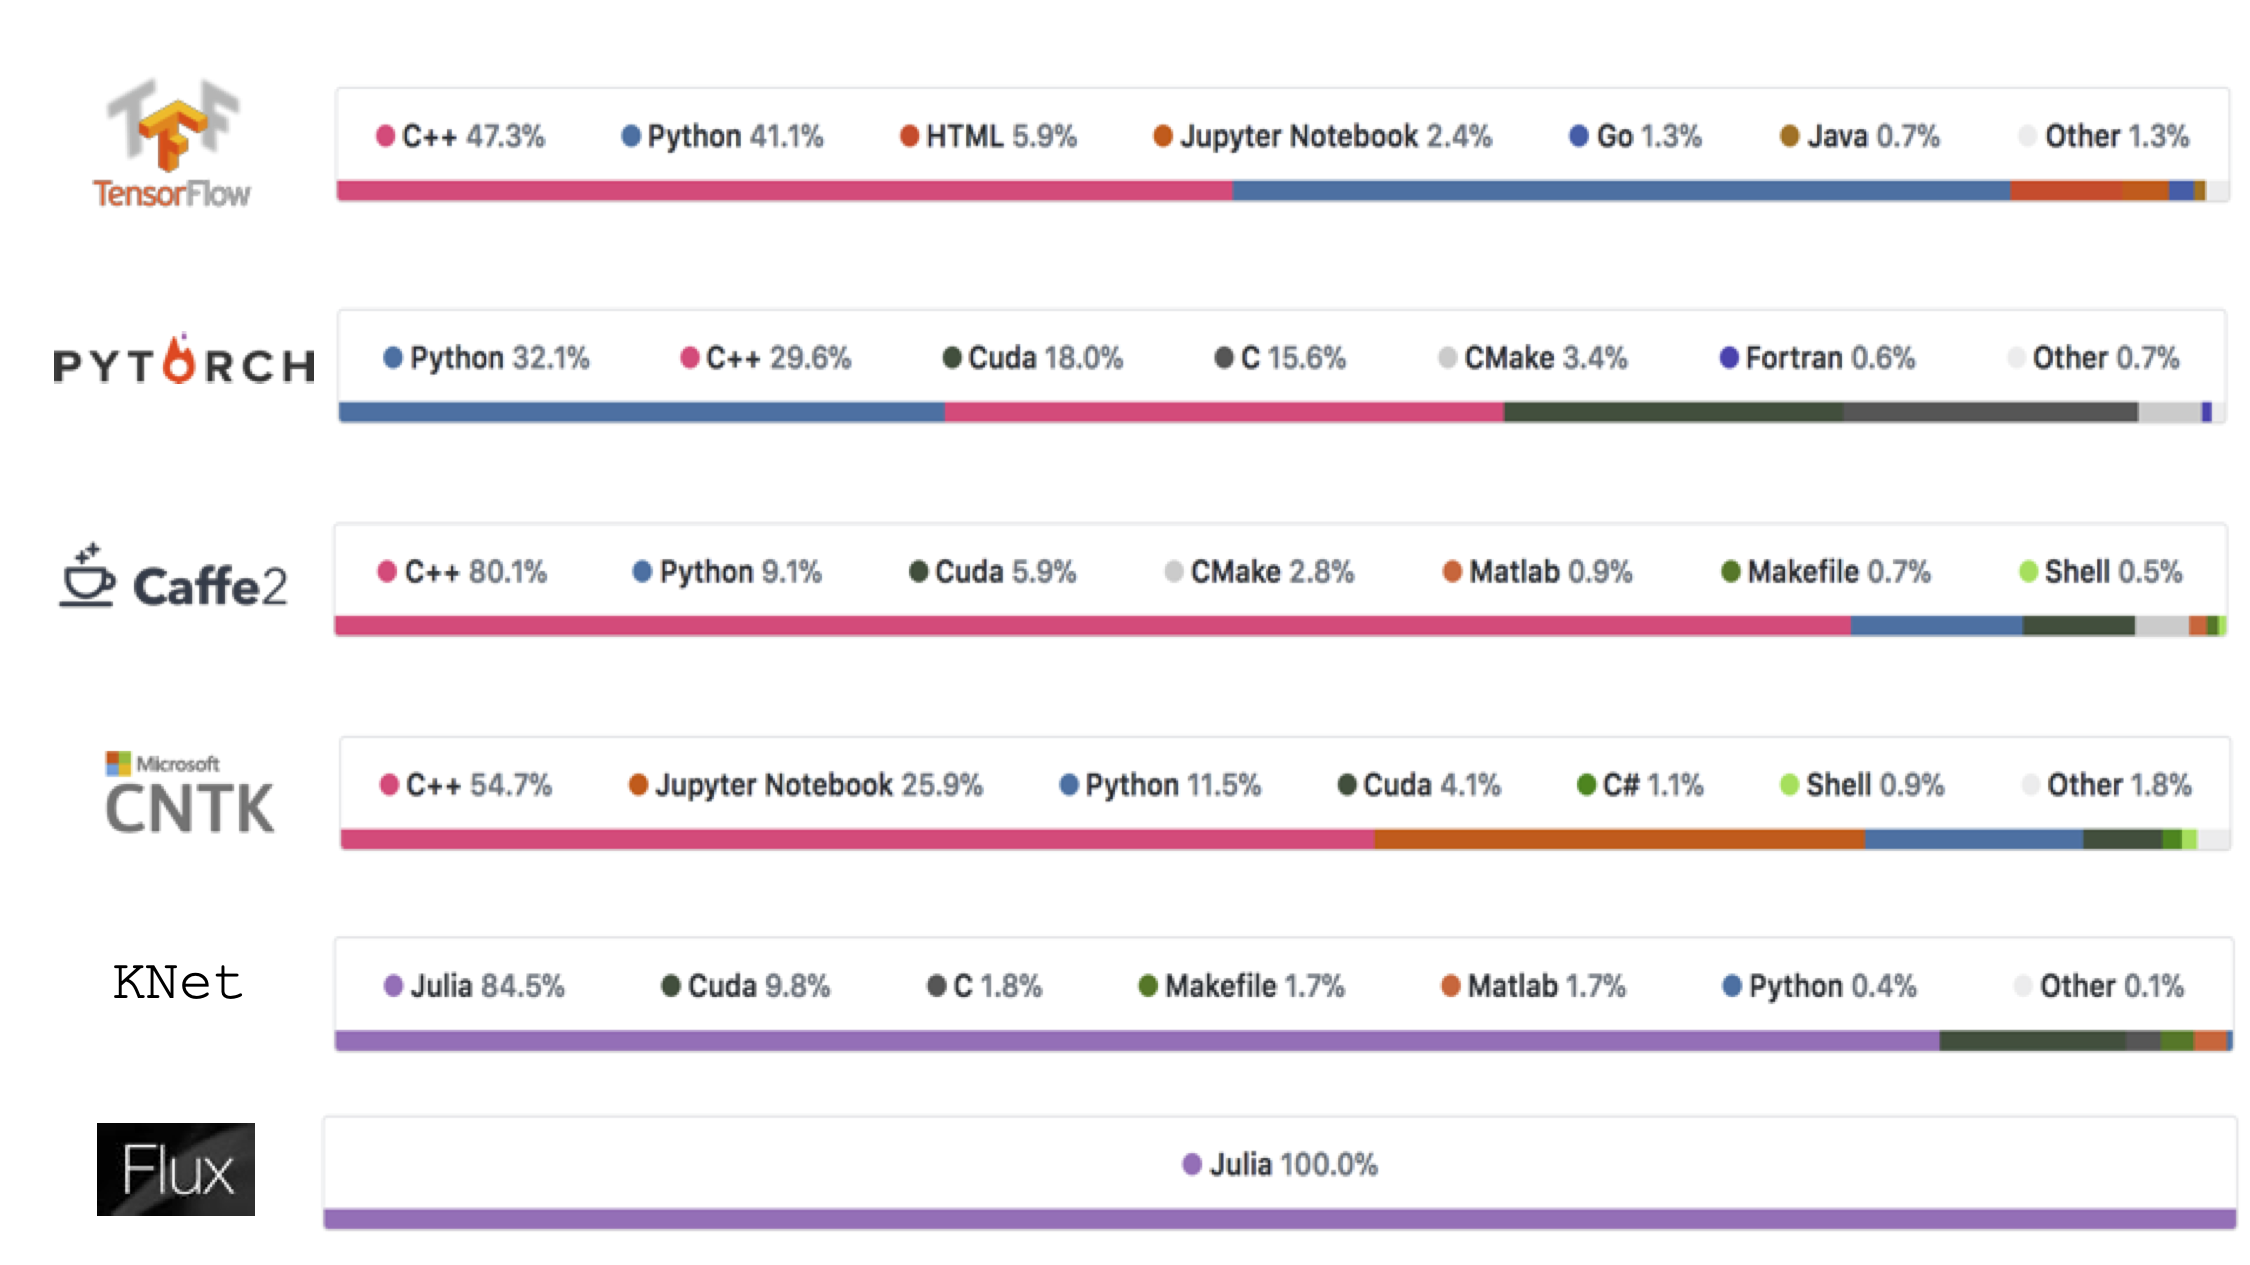

# What's the Catch?

Julia is in its youth.

- Googling for answers / solutions is less successful than older langues
  - however, the [discourse community](https://discourse.julialang.org/) is active and quick to respond
- Iterative compilation time is non-trivial
  - JIT compilation is key to Julia's performance and flexibility
  - Consequently, package compilation time can be very time consumption, "time to first plot"
  - The core focus of the Julia developers, dramatic reductions in Julia v1.5 and v1.6
- Julia can feel quirky at times (not buggy)
  - with great power comes great responsibility
  - easy to build complex systems that are hard to debug and compiler messages is some cases might not helpful (like C++) 
- Abandoned and merged packages
- Changing package requirements / syntax / performance

Where is Julia going?  See [State of Julia](https://youtu.be/IlFVwabDh6Q) talk from JuliaCon 2021

# Lets learn Julia!